In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install sweetviz 
import sweetviz as sv


In [6]:
dataset= pd.read_csv("C:/Users/pawan/datascience assignment/Simple linear regression/Salary_Data.csv")
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
dataset.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [9]:
type(dataset)

pandas.core.frame.DataFrame

In [10]:
dataset.shape

(30, 2)

In [11]:
dataset.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [12]:
dataset.info

<bound method DataFrame.info of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [13]:
dataset[dataset.duplicated()].shape

(0, 2)

In [14]:
dataset[dataset.duplicated()]

,YearsExperience,Salary


<AxesSubplot:>

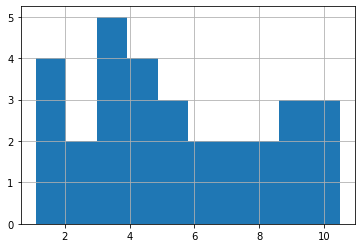

In [19]:
dataset['YearsExperience'].hist()

<AxesSubplot:>

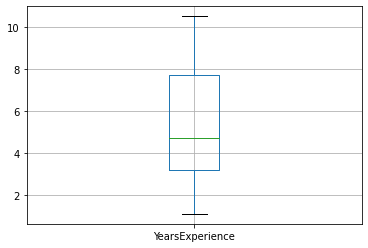

In [18]:
dataset.boxplot(column=['YearsExperience'])

In [20]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [21]:
dataset[dataset.isnull().any(axis=1)]

,YearsExperience,Salary


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


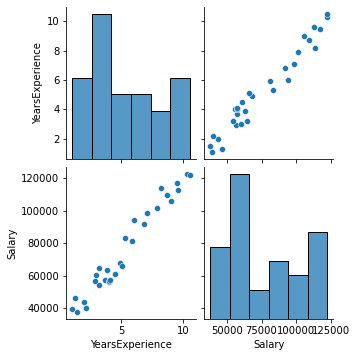

In [22]:
import seaborn as sns
sns.pairplot(dataset)
dataset.corr()

C:\Users\pawan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

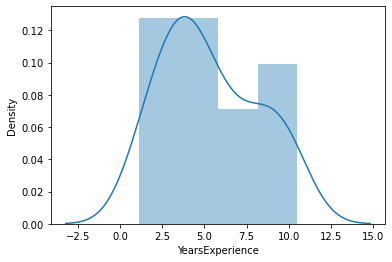

In [24]:
sns.distplot(dataset['YearsExperience'])

C:\Users\pawan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

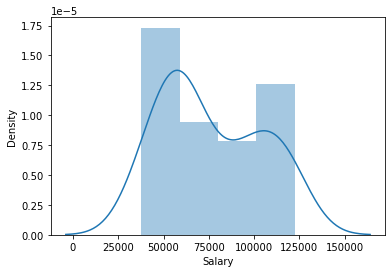

In [25]:
sns.distplot(dataset['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

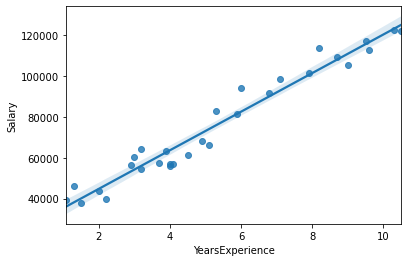

In [26]:
import statsmodels.formula.api as smf
model=smf.ols("dataset['Salary']~dataset['YearsExperience']",data=dataset).fit()
sns.regplot(x="YearsExperience",y="Salary",data=dataset)  

In [27]:
model.params

Intercept                     25792.200199
dataset['YearsExperience']     9449.962321
dtype: float64

In [28]:
print(model.tvalues,'\n',model.pvalues)

Intercept                     11.346940
dataset['YearsExperience']    24.950094
dtype: float64 
 Intercept                     5.511950e-12
dataset['YearsExperience']    1.143068e-20
dtype: float64


In [29]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [30]:
model.conf_int(0.05)

,0,1
Intercept,21136.061314,30448.339084
dataset['YearsExperience'],8674.118747,10225.805896


In [31]:
pred = model.predict(dataset)
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64